# evaluate.py

Basic Evaluation Metrics:
Precision: 1.0
Recall: 0.6666666666666666
F1-Score: 0.8
AUC-ROC: 0.8333333333333333


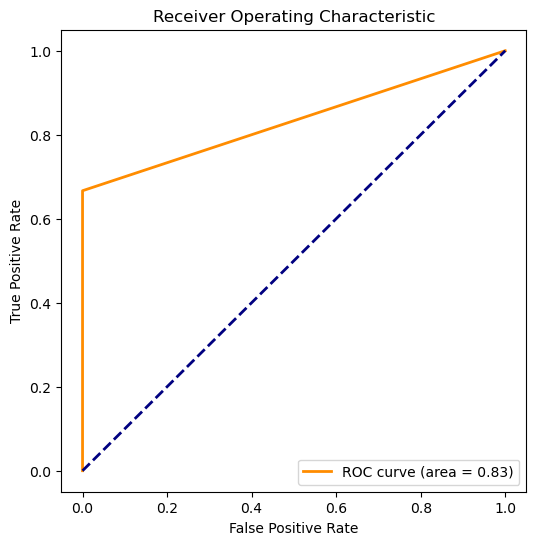

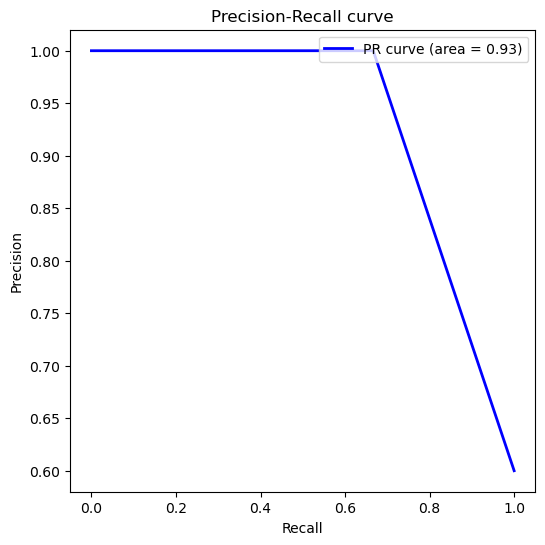

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [1]:
from evaluation import ModelEvaluator

y_true = [0, 1, 1, 0, 1]  
y_pred = [0, 1, 0, 0, 1] 

evaluator = ModelEvaluator(y_true, y_pred)
evaluator.full_report()

# data_loader.py

In [2]:

from data_loader import DataLoader

loader = DataLoader('../../data/creditcard_2023_head.csv')
df_head = loader.load_head()
df_head

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
# Load setups
setup1 = loader.load_setup('../../data/setup_1.pkl')

X_train = loader.transform_data(setup1['X_train'], is_train=True)
X_test = loader.transform_data(setup1['X_test'], is_train=False)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (255883, 29)
Testing Data Shape: (56864, 29)


In [4]:
X_train[0]

array([-0.80852846,  0.6748586 , -0.44905297, -1.00988653, -0.313425  ,
       -0.32931959, -0.03274487,  0.59610306,  0.68986241,  1.07258022,
       -0.96213343,  1.77609009, -0.44083387,  2.83622129, -0.32704494,
        0.87048261,  0.54950774,  1.13099248, -0.04664184, -0.0519656 ,
        0.06879708,  1.02346154,  0.37724121, -0.61101358, -0.43007122,
       -0.38585646,  0.21165591,  0.68693884, -0.92328591])

In [5]:
X_test[0]

array([-0.42685279,  0.11765463,  0.88815172, -1.29582911,  0.08429819,
        0.08235994,  0.53681129, -0.17426675,  1.53562212,  1.00832226,
       -1.04576177,  1.37347141,  1.41235665,  0.31689229,  0.24849599,
        0.4771342 ,  0.23682485,  0.07027174, -0.40521155,  0.03716484,
       -0.17980949, -0.32890187,  0.03545291,  0.09926965, -0.30785934,
       -1.06230717, -1.49209032, -1.55773591, -0.9570468 ])

In [6]:
y_test = setup1['y_test']
y_test.shape

(56864,)

# models.py

In [7]:
import models

In [8]:
model = models.NaiveBaseline()
y_pred = model.predict(X_test)

evaluator = ModelEvaluator(y_test, y_pred)
evaluator.basic_evaluation()

Basic Evaluation Metrics:
Precision: 0.5
Recall: 1.0
F1-Score: 0.6666666666666666
AUC-ROC: 0.5


In [9]:
model = models.KMeansAnomalyDetector(n_clusters=2, n_init=10, random_state=0)
model.fit(X_test)
y_pred = model.predict(X_test)

evaluator = ModelEvaluator(y_test, y_pred)
evaluator.basic_evaluation()

Basic Evaluation Metrics:
Precision: 0.999815973500184
Recall: 0.7643500281373101
F1-Score: 0.8663690001594643
AUC-ROC: 0.8821046707934721


In [10]:
model = models.DBSCANAnomalyDetector(eps=4, min_samples=5)
y_pred = model.fit_predict(X_test)
y_pred = (y_pred != 0) # DBScan outputs -1 for noise labels...

evaluator = ModelEvaluator(y_test, y_pred)
evaluator.basic_evaluation()

Basic Evaluation Metrics:
Precision: 0.47876447876447875
Recall: 0.013083849184018007
F1-Score: 0.025471601218802424
AUC-ROC: 0.49941966797974113


In [15]:
model = models.OCSVM()
model.fit(X_train[:10000]) # minibatching
y_pred = model.predict(X_test)
y_pred = (y_pred == -1).astype(int)

evaluator = ModelEvaluator(y_test, y_pred)
evaluator.basic_evaluation()

Basic Evaluation Metrics:
Precision: 0.650750640790919
Recall: 0.9376055149127743
F1-Score: 0.7682752856751732
AUC-ROC: 0.7172024479459763


In [16]:
model = models.SGDOCSVM()
model.fit(X_train)
y_pred = model.predict(X_test)
y_pred = (y_pred == -1).astype(int)

evaluator = ModelEvaluator(y_test, y_pred)
evaluator.basic_evaluation()

Basic Evaluation Metrics:
Precision: 0.6823598502459197
Recall: 0.9807962858750704
F1-Score: 0.8048023781006942
AUC-ROC: 0.7621166291502534


In [17]:
model = models.KNNAnomalyDetector(n_neighbors=5)
model.fit(X_train)
model.compute_threshold(X_train, percentile=95)
y_pred = model.predict(X_test)
y_pred = (y_pred == True).astype(int)

evaluator = ModelEvaluator(y_test, y_pred)
evaluator.basic_evaluation()

Basic Evaluation Metrics:
Precision: 0.9368128643530654
Recall: 0.8421496904895892
F1-Score: 0.8869626419218017
AUC-ROC: 0.8926737478897018


In [18]:
model = models.IsolationForestDetector(n_estimators=100, max_samples='auto', contamination='auto', random_state=42)
model.fit(X_train)
y_pred = model.predict(X_test)
y_pred = (y_pred == -1).astype(int)

evaluator = ModelEvaluator(y_test, y_pred)
evaluator.basic_evaluation()

Basic Evaluation Metrics:
Precision: 0.9485063869973657
Recall: 0.671180360157569
F1-Score: 0.7861012131572986
AUC-ROC: 0.8173712718064153


# utils.py

In [22]:
from utils import create_subset, tsne_scatter

features, labels = create_subset(X_test, y_test, subset_size=0.1)

c:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


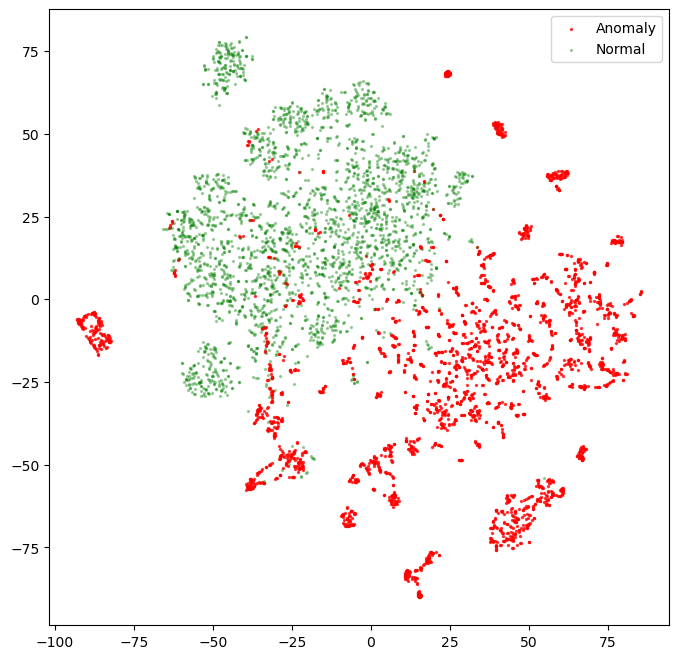

In [23]:
tsne_scatter(features, labels, dimensions=2, save_as='tsne_plot_2d.png')

c:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


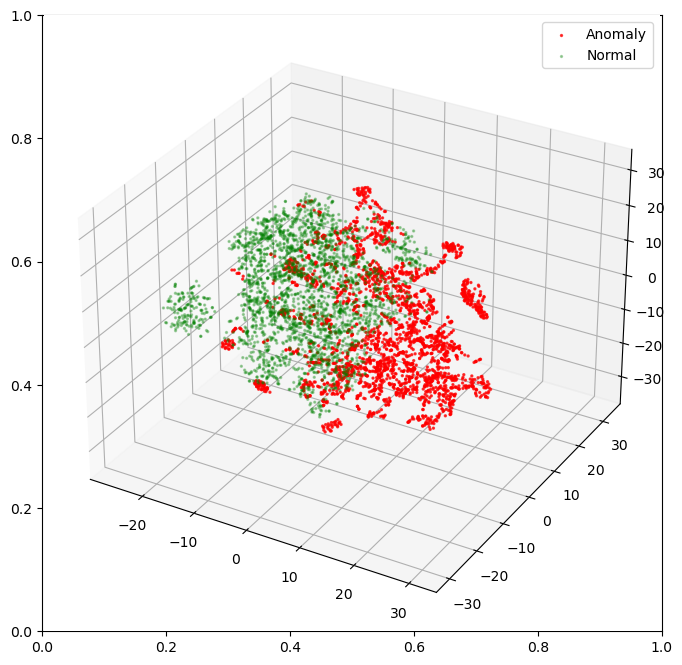

In [24]:
tsne_scatter(features, labels, dimensions=3, save_as='tsne_plot_3d.png')